training score : 1.0


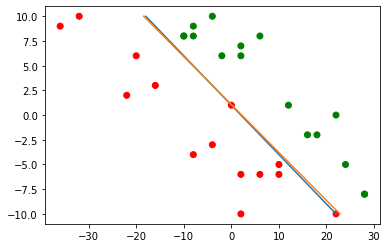

In [155]:
import numpy as np
import matplotlib.pyplot as plt

_range=10

Xs,Ys=LineXYs(_range)
plt.plot(Xs,Ys)

testData = CreateData(30,_range)
#print(np.array(testData))

data=np.array(testData)[:,:-1]
x=np.array(testData)[:,0]
y=np.array(testData)[:,1]
target=np.array(testData)[:,-1]

colors = Label2Color(target)

plt.scatter(x,y,color = colors)

#print(x)
#print(y)
#print(target)
#print(colors)

l_Xs,l_Ys = FitData(data,target,10)
plt.plot(l_Xs,l_Ys)

plt.show()



In [63]:
def TargetFunc(x2):
    x1=2-(2*x2)
    return x1

In [60]:
import random

def GenerateRandomData(_range, Noise):
    x2 = random.randint(-_range,_range)
    x1 = TargetFunc(x2)
    
    NoisyX1 = x1+ (Noise * random.randint(-_range,_range))
    
    label = NoisyX1>x1
    
    return [NoisyX1,x2,label]

In [61]:
def CreateData(count,_range):
    
    data=list([])
    
    for i in range(0,count):
        data.append(GenerateRandomData(_range,2))
        
    return data

In [71]:
def Label2Color(labels):
    colors=list([])

    for t in labels:
        if(t==1):
            colors.append('green')
        else :
            colors.append('red')
    
    return colors

In [123]:
import random

def LineXYs(_range):
    Xs=list([])
    Ys=list([-_range,_range])
    
    for v in Ys:
        Xs.append(TargetFunc(v))
        
    return Xs,Ys
    
def LineXYs2(_range, a,b,c):
    Xs=list([])
    Ys=list([-_range,_range])
    
    for v in Ys:
        Xs.append( ((b*v)+c)/(-a) )
        
    return Xs,Ys

In [132]:
from sklearn.linear_model import Perceptron

def FitData(data,target,iterations):
    
    clf = Perceptron(tol=1e-3 , random_state=0)
    clf.fit(data,target)
    
    print(f'training score : {clf.score(data,target)}')
    #print(f'coef_ : {clf.coef_}')
    #print(f'intercept_ : {clf.intercept_}')
    
    return LineXYs2(_range, clf.coef_[0,0],clf.coef_[0,1],clf.intercept_[0])